In [289]:
import pandas as pd

In [290]:
df = pd.read_csv('income.csv')

In [291]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [292]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [293]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [294]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [295]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [296]:
df = pd.concat([df.drop('occupation',axis=1),pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass',axis=1),pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('relationship',axis=1),pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('marital-status',axis=1),pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('race',axis=1),pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country',axis=1),pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [297]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [298]:
df['gender'] = df['gender'].apply(lambda x:1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x:1 if x == '>50K' else 0)


In [299]:
df.iloc[:, 8:] = df.iloc[:, 8:].applymap(lambda x: 1 if x is True else 0)

In [300]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [301]:
df.income.value_counts()
print(df.shape[1])

92


<Axes: >

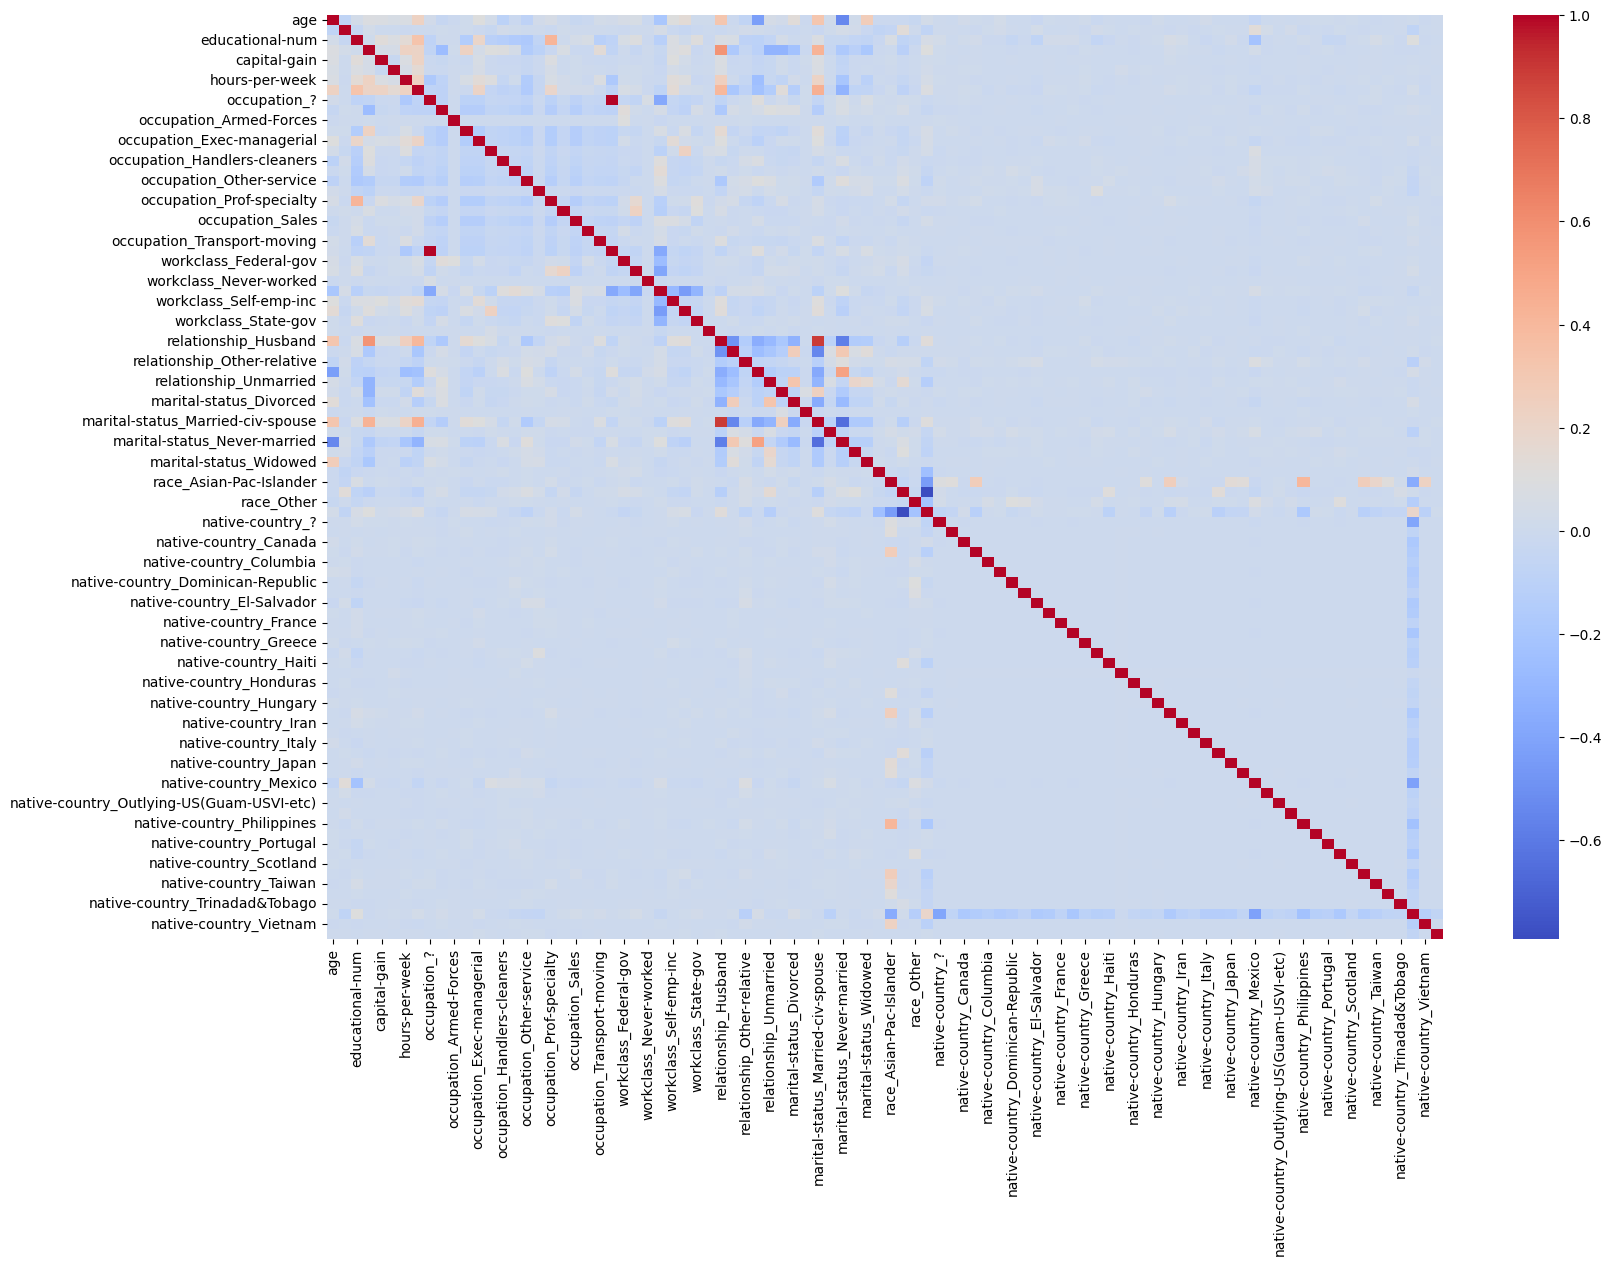

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [303]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [304]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,1
1,38,9,1,0,0,50,0,0,0,0,0,1,0,0,0,0,0,1,0
2,28,12,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0
3,44,10,1,7688,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,0,0,0,1,0,1,0
48838,40,9,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,0,0,1


In [305]:
print(df_dropped.shape[1])

19


<Axes: >

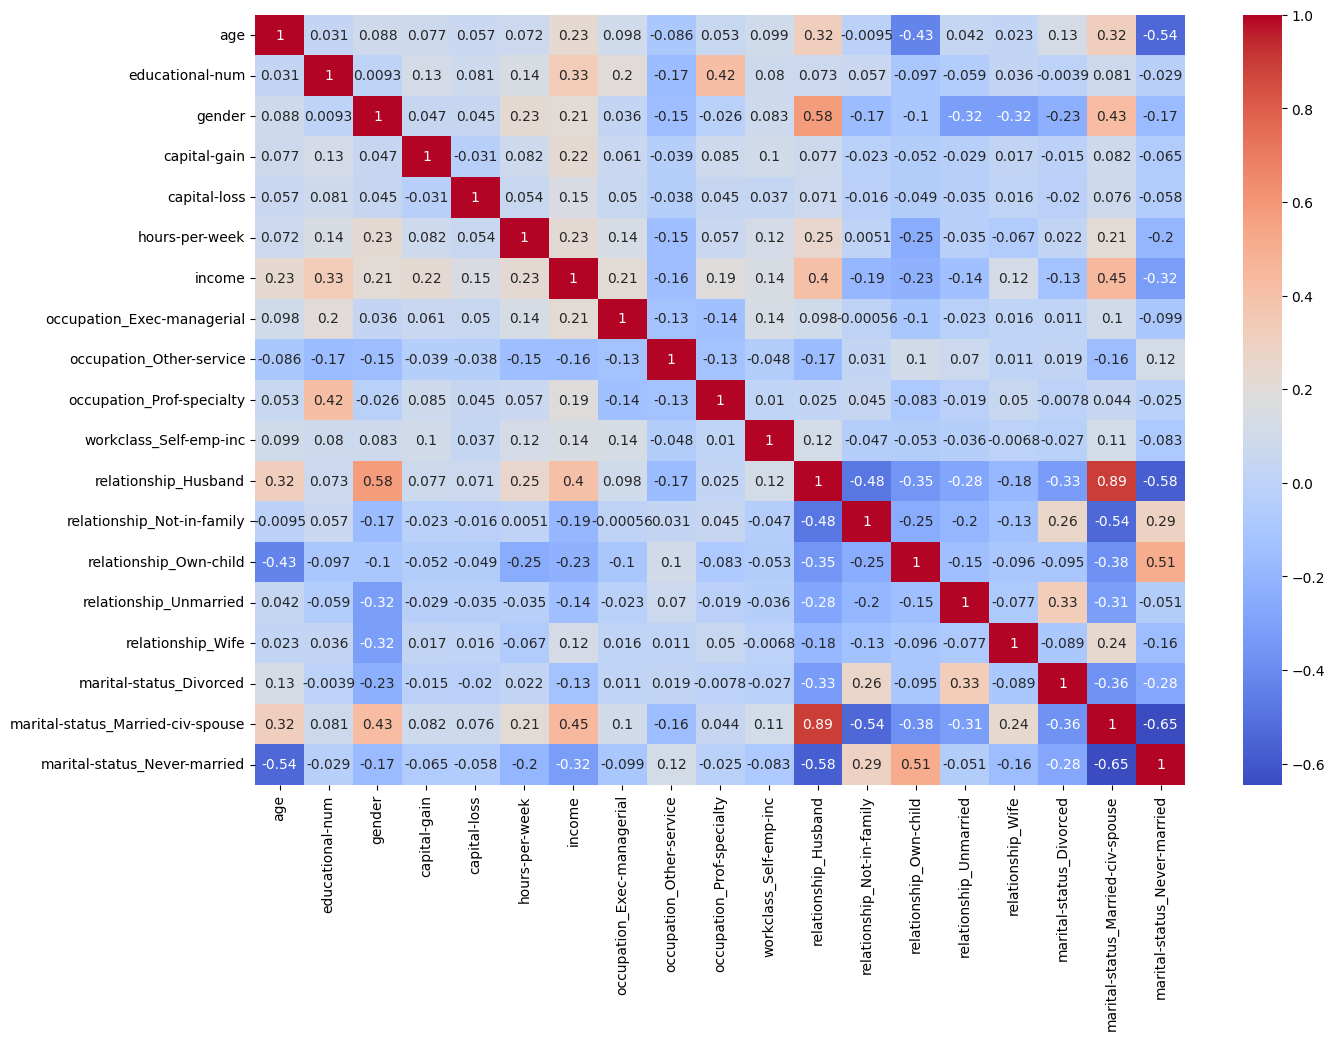

In [309]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2)

In [311]:
train_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
20074,19,52372,10,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17568,57,182062,6,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41194,19,199495,10,1,0,0,60,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23814,26,224361,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12150,41,408229,10,1,0,0,15,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,34,253616,10,1,0,0,60,1,0,0,...,0,0,0,0,0,0,0,1,0,0
31764,39,247733,9,0,0,0,16,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38234,23,636017,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48795,40,142657,11,1,0,0,45,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [312]:
test_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
8139,49,105959,10,1,0,0,41,1,0,1,...,0,0,0,0,0,0,0,1,0,0
43626,50,270194,13,1,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16390,42,124692,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28877,28,205337,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41283,46,98350,6,1,0,0,37,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23829,37,433491,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30043,58,123436,13,1,7688,0,50,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30489,40,171231,13,1,0,0,40,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5795,22,267412,1,0,594,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
train_x = train_df.drop('income', axis=1)
train_y = train_df['income']

test_x = train_df.drop('income', axis=1)
test_y = train_df['income']

In [316]:
forest= RandomForestClassifier()

forest.fit(train_x,train_y)

RandomForestClassifier()

In [317]:
forest.score(test_x,test_y)

0.9998976275177233

In [320]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(),key=lambda x: x[1], reverse=True)}

In [321]:
print(importances)

{'fnlwgt': 0.16984093281606844, 'age': 0.15280186121029712, 'educational-num': 0.1167949785875255, 'capital-gain': 0.09965796736169134, 'hours-per-week': 0.08097084176101585, 'marital-status_Married-civ-spouse': 0.07193906784181646, 'relationship_Husband': 0.03882429465236847, 'capital-loss': 0.033183539877222064, 'marital-status_Never-married': 0.024305815949625904, 'occupation_Exec-managerial': 0.017797753191244017, 'occupation_Prof-specialty': 0.015126694821546653, 'gender': 0.01295099596711277, 'relationship_Not-in-family': 0.01137233037658541, 'relationship_Wife': 0.009072862746738129, 'workclass_Private': 0.008249973016518398, 'marital-status_Divorced': 0.007814667773673454, 'occupation_Other-service': 0.00726162577342658, 'workclass_Self-emp-not-inc': 0.007053429862316869, 'relationship_Own-child': 0.006576230634301631, 'occupation_Craft-repair': 0.005647509325204889, 'occupation_Sales': 0.005632229787698827, 'native-country_United-States': 0.00552814104422455, 'race_White': 0.0